<a href="https://colab.research.google.com/github/priba/kornia-examples/blob/master/filter_blurring.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Filtering Operations

In this tutorial you are going to learn how to use the different filtering operations found in `kornia.filters`.

## Install Kornia

In [1]:
!pip install git+https://github.com/arraiyopensource/kornia

import kornia
print(f"Kornia version: {kornia.__version__}")

  Cloning https://github.com/arraiyopensource/kornia to /tmp/pip-req-build-wq0fyrvl
  Running command git clone -q https://github.com/arraiyopensource/kornia /tmp/pip-req-build-wq0fyrvl
  Created wheel for kornia: filename=kornia-0.1.2+a0bafcd-py2.py3-none-any.whl size=124831 sha256=9927c04a0af66111f3a8d1581d8d4ad5ea062b7008badd617527d510d215f05a
  Stored in directory: /tmp/pip-ephem-wheel-cache-9hkm7cx1/wheels/a0/47/86/854e2f9a801b368f296cb25f167cbd56aa805f974b15421a67
Successfully built kornia
Kornia version: 0.1.2+a0bafcd


## Prepare the data

Download an example image

In [2]:
!wget https://raw.githubusercontent.com/kornia/kornia/master/examples/data/drslump.jpg

--2019-12-13 15:45:14--  https://raw.githubusercontent.com/kornia/kornia/master/examples/data/drslump.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 60020 (59K) [image/jpeg]
Saving to: ‘drslump.jpg.1’

drslump.jpg.1       100%[===================>]  58.61K  --.-KB/s    in 0.01s   

2019-12-13 15:45:14 (3.86 MB/s) - ‘drslump.jpg.1’ saved [60020/60020]



Load the image using OpenCV and plot it

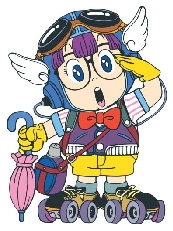

In [3]:
from matplotlib import pyplot as plt
import cv2
import numpy as np

# load using opencv and convert to RGB
img_bgr: np.array = cv2.imread('drslump.jpg', cv2.IMREAD_COLOR)
img_rgb: np.array = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb); plt.axis('off');

Create a batch of 4 identical images and normalize it between [0,1]

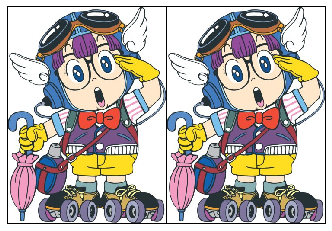

In [4]:
import torch
import torchvision

def imshow(input: torch.Tensor):
    out: torch.Tensor = torchvision.utils.make_grid(input, nrow=2)
    out_np: np.array = kornia.tensor_to_image(out)
    plt.imshow(out_np); plt.axis('off');

# stack four identical images
data: torch.Tensor = kornia.image_to_tensor(img_rgb)  # 1xCxHxW
data = data.expand(2, -1, -1, -1)  # 2xCxHxW

# normalize
data = kornia.normalize(data.float(), torch.zeros(3), 255. * torch.ones(3)).contiguous()

# plot
imshow(data)

## Apply a blurring filter

### Box Blur

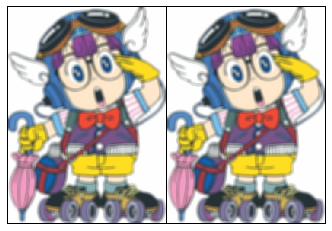

In [5]:
# Box Blur
x_blur: torch.Tensor = kornia.box_blur(data, (9, 9))
imshow(x_blur)

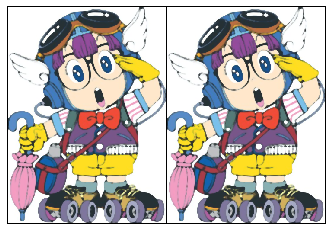

In [6]:
# Media Blur
x_blur: torch.Tensor = kornia.median_blur(data, (5, 5))
imshow(x_blur)

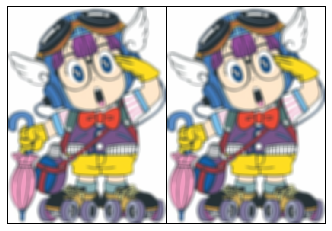

In [7]:
# Gaussian Blur
x_blur: torch.Tensor = kornia.gaussian_blur2d(data, (11, 11), (11., 11.))
imshow(x_blur)